In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("pitch_movement_CT.csv")

print(df.shape)
print(df.keys())
df.head()

(135, 24)
Index(['year', 'last_name', ' first_name', 'pitcher_id', 'team_name',
       'team_name_abbrev', 'pitch_hand', 'avg_speed', 'pitches_thrown',
       'total_pitches', 'pitches_per_game', 'pitch_per', 'pitch_type',
       'pitch_type_name', 'pitcher_break_z', 'league_break_z', 'diff_z',
       'rise', 'pitcher_break_x', 'league_break_x', 'diff_x', 'tail',
       'percent_rank_diff_z', 'percent_rank_diff_x'],
      dtype='object')


,year,last_name,first_name,pitcher_id,team_name,team_name_abbrev,pitch_hand,avg_speed,pitches_thrown,total_pitches,...,pitcher_break_z,league_break_z,diff_z,rise,pitcher_break_x,league_break_x,diff_x,tail,percent_rank_diff_z,percent_rank_diff_x
0,2022,Burnes,Corbin,669203,Brewers,MIL,R,95.1,1813,3274,...,18.6,-19.3,0.7,4,4.4,2.9,1.5,52,0.664179,0.776119
1,2022,Quantrill,Cal,615698,Guardians,CLE,R,88.5,1052,2920,...,27.8,-27.1,-0.7,-3,2.7,2.9,-0.2,-6,0.402985,0.507463
2,2022,Darvish,Yu,506433,Padres,SD,R,86.5,1046,2971,...,35.3,-29.2,-6.1,-21,5.2,2.8,2.4,85,0.022388,0.865672
3,2022,Bumgarner,Madison,518516,D-backs,AZ,L,87.4,987,2715,...,27.7,-28.1,0.4,1,2.9,2.6,0.2,9,0.611940,0.589552
4,2022,Ashcraft,Graham,668933,Reds,CIN,R,97.3,843,1756,...,19.3,-19.3,0.0,0,0.6,1.0,-0.4,-40,0.552239,0.477612


In [4]:
del df['year']
del df['team_name']
del df['pitches_per_game']
del df['pitch_per']
del df['league_break_z']
del df['diff_z']
del df['rise']
del df['league_break_x']
del df['diff_x']
del df['tail']
del df['percent_rank_diff_z']
del df['percent_rank_diff_x']

In [5]:
df.head()
print(df.keys())

Index(['last_name', ' first_name', 'pitcher_id', 'team_name_abbrev',
       'pitch_hand', 'avg_speed', 'pitches_thrown', 'total_pitches',
       'pitch_type', 'pitch_type_name', 'pitcher_break_z', 'pitcher_break_x'],
      dtype='object')


In [6]:
df["name"] = df[" first_name"].str.cat(df["last_name"], sep=" ")

In [7]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('name')))
df = df.reindex(columns= cols)

In [8]:
df.rename(columns={'pitcher_break_z':'vertical_break','pitcher_break_x':'horizonal_break','team_name_abbrev':'team_name'},inplace=True)

In [10]:
df.to_csv('cutter_data.csv', index=False)

# EDA

In [12]:
df.describe()

,pitcher_id,avg_speed,pitches_thrown,total_pitches,vertical_break,horizonal_break
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,593946.466667,88.734074,341.496296,1543.140741,26.942963,2.733333
std,73369.865741,3.013234,260.796681,826.460987,5.105214,1.922956
min,425794.000000,82.300000,35.000000,493.000000,14.500000,0.000000
25%,543189.000000,86.850000,168.500000,828.500000,23.550000,1.100000
50%,621107.000000,88.600000,271.000000,1202.000000,27.100000,2.500000
75%,656835.000000,90.300000,480.000000,2221.500000,29.600000,4.000000
max,693821.000000,99.500000,1813.000000,3274.000000,45.000000,8.400000


In [14]:
341/1543

#In 2022, MLB pitchers threw 22% cut fastball in average

0.22099805573558004

In [13]:
df.corr()

,pitcher_id,avg_speed,pitches_thrown,total_pitches,vertical_break,horizonal_break
pitcher_id,1.000000,0.032396,-0.182616,-0.151728,0.129880,0.081131
avg_speed,0.032396,1.000000,0.147459,-0.082939,-0.777228,-0.143763
pitches_thrown,-0.182616,0.147459,1.000000,0.538208,-0.158117,0.170236
total_pitches,-0.151728,-0.082939,0.538208,1.000000,0.036432,0.077892
vertical_break,0.129880,-0.777228,-0.158117,0.036432,1.000000,0.281793
horizonal_break,0.081131,-0.143763,0.170236,0.077892,0.281793,1.000000


<AxesSubplot:>

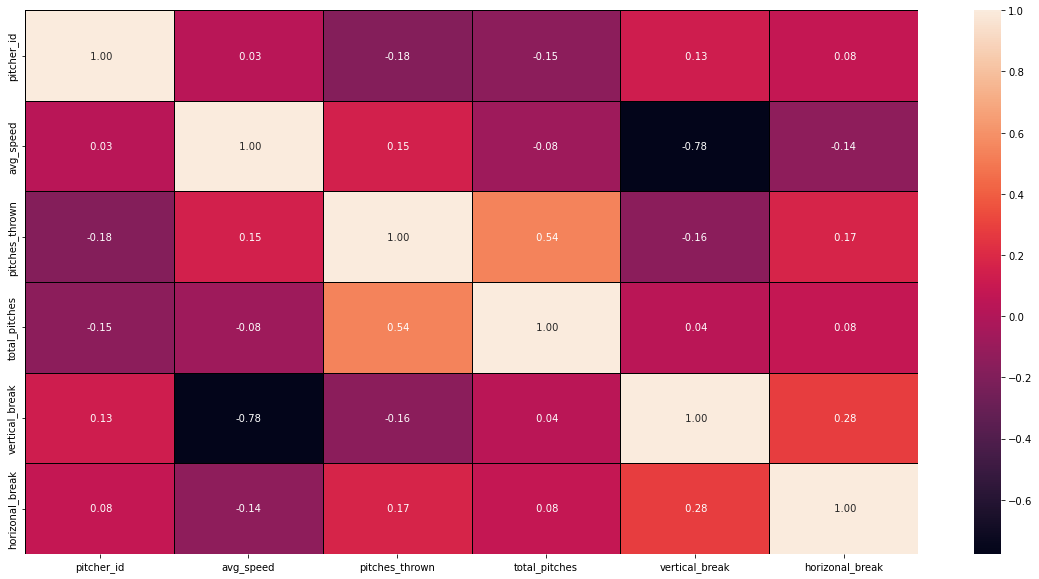

In [15]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

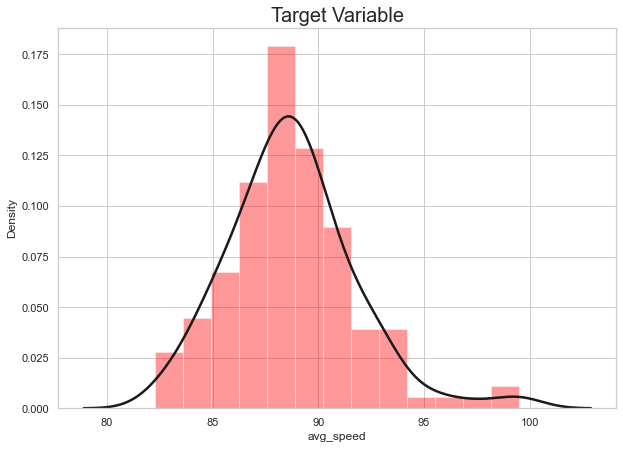

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(df['avg_speed'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

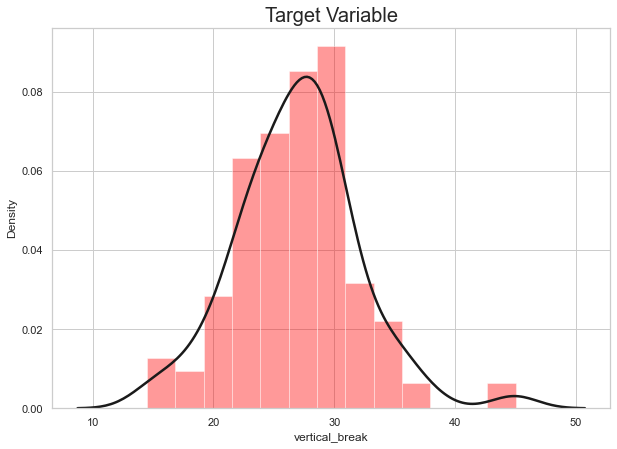

In [17]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(df['vertical_break'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

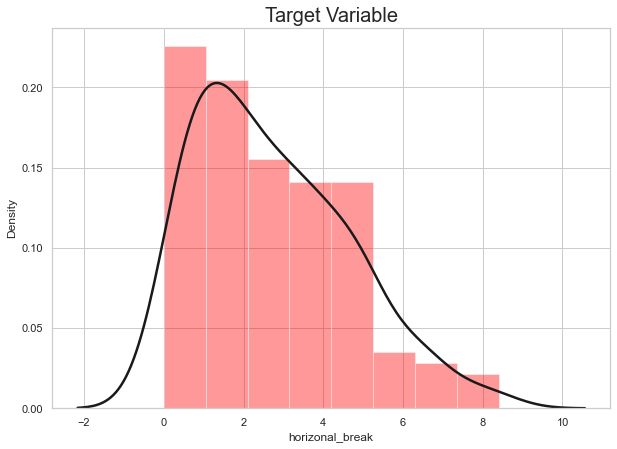

In [18]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(df['horizonal_break'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

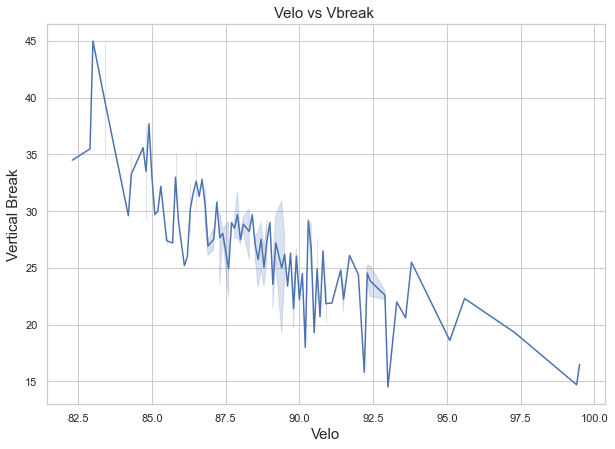

In [19]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='avg_speed', y='vertical_break')
plt.title('Velo vs Vbreak ', fontsize=15)
plt.xlabel('Velo', fontsize=15)
plt.ylabel('Vertical Break',fontsize=15)
plt.show()

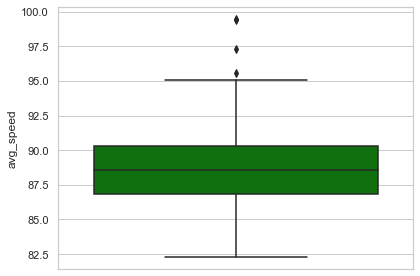

In [20]:
sns.boxplot(y=df['avg_speed'], color='green', orient='x')
plt.tight_layout()

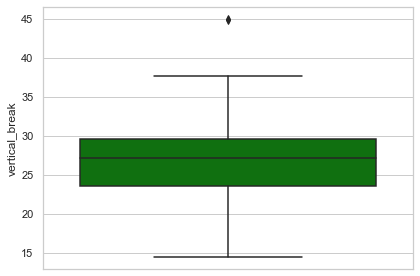

In [21]:
sns.boxplot(y=df['vertical_break'], color='green', orient='x')
plt.tight_layout()

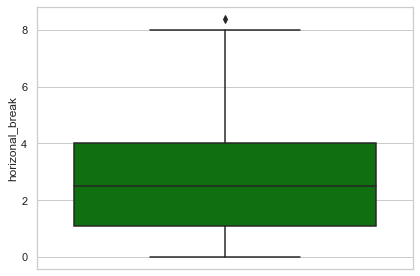

In [22]:
sns.boxplot(y=df['horizonal_break'], color='green', orient='x')
plt.tight_layout()

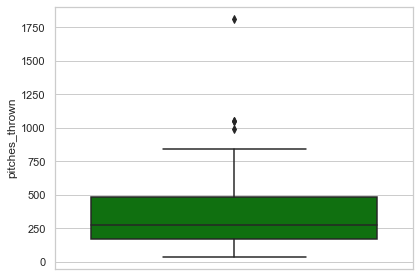

In [23]:
sns.boxplot(y=df['pitches_thrown'], color='green', orient='x')
plt.tight_layout()

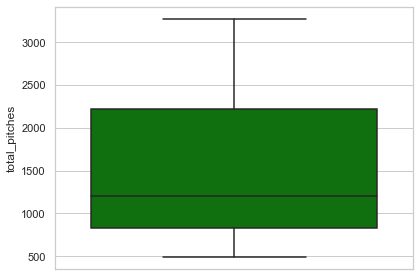

In [24]:
sns.boxplot(y=df['total_pitches'], color='green', orient='x')
plt.tight_layout()